In [1]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=93439585ed619600dff070fe3c39076982eea0d8f2a2645f30e6bb01d1f81e5d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
time = ctrl.Antecedent(np.arange(7, 23, 1), 'time')
day = ctrl.Antecedent(np.arange(2, 9, 1), 'day')
size = ctrl.Antecedent(np.arange(1, 13, 1), 'size')

tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

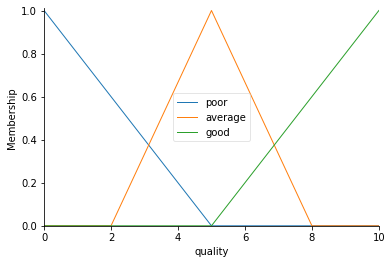

In [4]:
quality.automf(3)
quality['average'] = fuzz.trimf(quality.universe, [2, 5, 8])

quality.view()

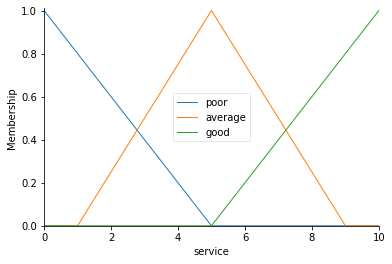

In [5]:
service.automf(3)
service['average'] = fuzz.trimf(service.universe, [1, 5, 9])

service.view()

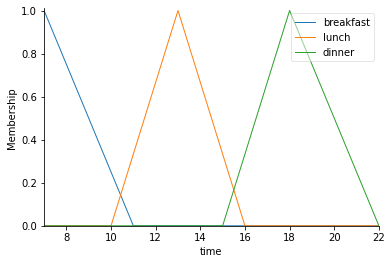

In [6]:
time['breakfast'] = fuzz.trimf(time.universe, [7, 7, 11])
time['lunch'] = fuzz.trimf(time.universe, [10, 13, 16])
time['dinner'] = fuzz.trimf(time.universe, [15, 18, 22])

time.view()

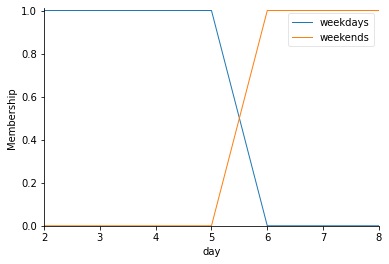

In [7]:
day['weekdays'] = fuzz.trapmf(day.universe, [1, 1, 5, 5])
day['weekends'] = fuzz.trapmf(day.universe, [5, 6, 8, 8])

day.view()

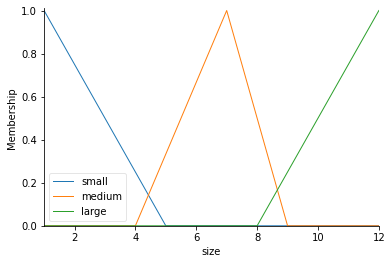

In [8]:
size['small'] = fuzz.trimf(size.universe, [1, 1, 5])
size['medium'] = fuzz.trimf(size.universe, [4, 7, 9])
size['large'] = fuzz.trimf(size.universe, [8, 12, 12])

size.view()

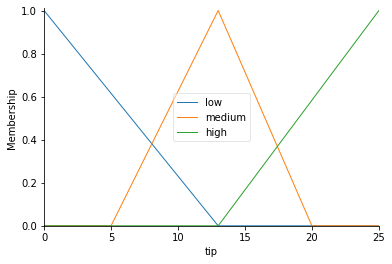

In [9]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [5, 13, 20])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

tip.view()

### Proposed rules:

In [10]:
r1 = ctrl.Rule(service['poor'] & quality['poor'], tip['low'])
r2 = ctrl.Rule(service['poor'] & quality['average'] & time['breakfast'], tip['low'])
r3 = ctrl.Rule(service['average'] & quality['average'] & time['breakfast'], tip['medium'])
r4 = ctrl.Rule(service['poor'] | service['average'] & quality['average'] | quality['good'] & time['lunch'] | time['dinner'], tip['medium'])
r5 = ctrl.Rule(service['average'] & quality['average'] & time['breakfast'], tip['medium'])
r6 = ctrl.Rule(service['good'] & quality['average'] | quality['good'] & time['lunch'] | time['dinner'], tip['high'])
r7 = ctrl.Rule(service['poor'] & quality['average'] | quality['good'] & size['large'], tip['medium'])
r8 = ctrl.Rule(service['good'] & quality['average'] | quality['good'] & size['medium'] | size['large'], tip['high'])
r9 = ctrl.Rule(service['poor'] & quality['poor'] & size['medium'] | size['large'], tip['low'])
r10 = ctrl.Rule(service['poor'] & quality['average'] | quality['good'] & size['small'] & day['weekdays'], tip['medium'])
r11 = ctrl.Rule(service['average'] & quality['average'] | quality['good'] & size['small'] & day['weekdays'], tip['high'])
r12 = ctrl.Rule(service['average'] & quality['average'] | quality['good'] & size['small'] & day['weekends'], tip['medium'])
r13 = ctrl.Rule(service['average'] & quality['average'] | quality['good'] & size['medium'] | size['large'] & day['weekends'], tip['medium'])
r14 = ctrl.Rule(service['average'] & quality['average'] | quality['good'] & size['medium'] | size['large'] & day['weekends'], tip['medium'])
r15 = ctrl.Rule(service['good'] & quality['average'] | quality['good'] & size['medium'] | size['large'] & day['weekends'], tip['high'])

In [11]:
service['poor'] & quality['poor'], tip['low']
service['poor'] & quality['average'] & time['breakfast'], tip['low']
service['average'] & quality['average'] & time['breakfast'], tip['medium']
service['poor'] | service['average'] & quality['average'] | quality['good'] & time['lunch'] | time['dinner'], tip['medium']
service['average'] & quality['average'] & time['breakfast'], tip['medium']
service['good'] & quality['average'] | quality['good'] & time['lunch'] | time['dinner'], tip['high']
service['poor'] & quality['average'] | quality['good'] & size['large'], tip['medium']
service['good'] & quality['average'] | quality['good'] & size['medium'] | size['large'], tip['high']
service['poor'] & quality['poor'] & size['medium'] | size['large'], tip['low']
service['poor'] & quality['average'] | quality['good'] & size['small'] & day['weekdays'], tip['medium']
service['average'] & quality['average'] | quality['good'] & size['small'] & day['weekdays'], tip['high']
service['average'] & quality['average'] | quality['good'] & size['small'] & day['weekends'], tip['medium']
service['average'] & quality['average'] | quality['good'] & size['medium'] | size['large'] & day['weekends'], tip['medium']
service['average'] & quality['average'] | quality['good'] & size['medium'] | size['large'] & day['weekends'], tip['medium']
service['good'] & quality['average'] | quality['good'] & size['medium'] | size['large'] & day['weekends'], tip['high']

(((service[good] AND quality[average]) OR (quality[good] AND size[medium])) OR (size[large] AND day[weekends]),
 tip[high])

In [12]:
tipping_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [13]:
tipping.input['quality'] = 9
tipping.input['service'] = 5
tipping.input['time'] = 8
tipping.input['size'] = 1
tipping.input['day'] = 5

# Crunch the numbers
tipping.compute()

16.2523487747293


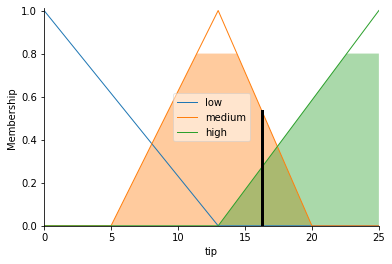

In [14]:
print(tipping.output['tip'])
tip.view(sim=tipping)